In [160]:
include("./src/supportFunctions.ji")
using Plots

# Car-mpg

In [656]:
include("RealWorldData.ji")
using Plots

In [585]:
X, Z, y, zmap = get_cardata()
y = y ./(maximum(y) - minimum(y)) 
y = y .- mean(y)
zmap

1-element Vector{Any}:
 Dict{Any, Any}(2 => [0, 0], 3 => [0, 1], 1 => [1, 0])

In [719]:
# ntrain = 260
# ntest = 392 - ntrain
# indr, indt = get_train_index(Z, ntrain)

# Xr, Zr, yr = X[indr, :], Z[indr, :], y[indr]
# Xt, Zt, yt = X[indt, :], Z[indt, :], y[indt]
width_exp1 = -0.2
width_exp5 = -0.1
width_exp9 = -0.2

# car_model9 = qgplsim.model(Xr, Zr, yr, [0.75], width_exp9)
# car_model1 = qgplsim.model(Xr, Zr, yr, [0.25], width_exp1)
car_model5 = qgplsim.model(Xr, Zr, yr, [0.5], width_exp5)
# qgplsim.estimator(car_model9)
# qgplsim.estimator(car_model1)
qgplsim.estimator(car_model5)

# qgplsim.print_model(car_model1)
# qgplsim.print_model(car_model5)
# qgplsim.print_model(car_model9)

carmodel = car_model5
vv = Xt * carmodel.theta + Zt * carmodel.gamma
ylx = Xt * carmodel.alpha
ylz = Zt * carmodel.beta
gv = qgplsim.predict(carmodel, Xt, Zt)
yp = gv + ylx + ylz

qgplsim.print_model(carmodel)

alpha => [0.0318, 0.0172, -0.0196, -0.1131]
theta => [0.9202, -0.3303, -0.0069, 0.2099]
gamma => [-0.2015, -0.0848]
beta => [-0.0091, 0.0216]


In [720]:
rmsd(yp, yt)

0.12161318138724715

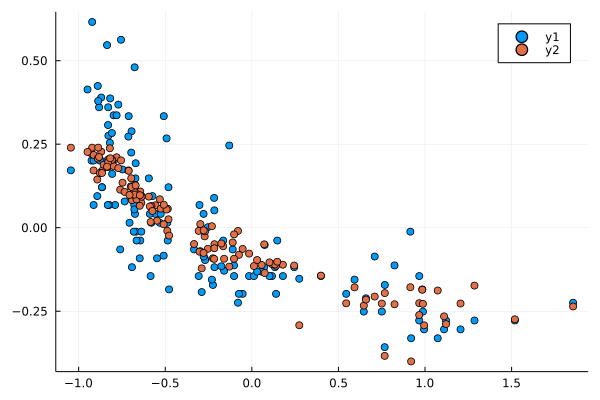

In [721]:
scatter(vv, yt)
scatter!(vv, yp)

theta => [0.0515, -0.0536, -0.0008, -0.1334]
beta => [-0.2462, -0.0045]


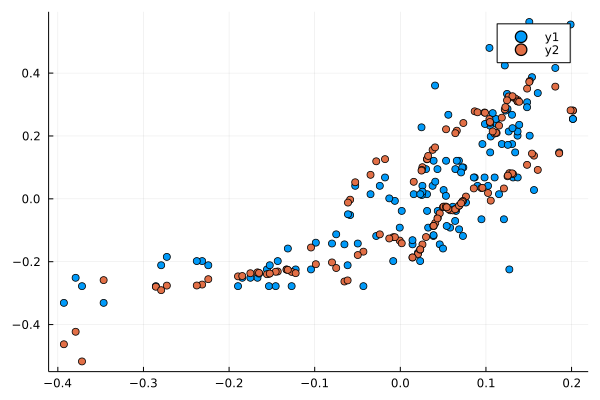

In [676]:
include("./src/semi_mave.ji")
car_model_mr = semiMAVE.model(Xr, Zr, yr)
semiMAVE.estimator(car_model_mr)   
semiMAVE.print_model(car_model_mr)
gvm, = semiMAVE.predictor(car_model_mr, Xt, Zt)
ypm = gvm  + Zt * car_model_mr.β

vv = Xt * car_model_mr.θ
scatter(vv, yt)
scatter!(vv, ypm)

In [677]:
rmsd(ypm, yt)

0.1213563123209305

## MC

In [722]:
X, Z, y, zmap = get_cardata()
y = y ./(maximum(y) - minimum(y)) 
y = y .- mean(y)
ntrain = 260
ntest = 392 - ntrain

132

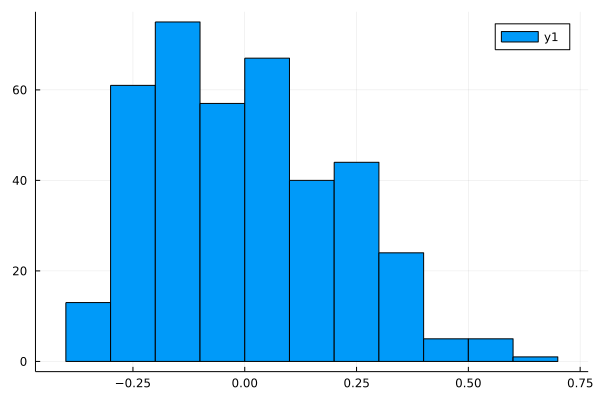

In [723]:
histogram(y)

In [734]:
include("RealWorldData.ji")
rec_qr = []
rec_mr = []
# tau_qr = [0.25, 0.5, 0.75]
tau_qr = [0.5]

@threads for k in 1:4
            for j in 1:5
        indr, indt = get_train_index(Z, ntrain)
        Xr, Zr, yr = X[indr, :], Z[indr, :], y[indr]
        Xt, Zt, yt = X[indt, :], Z[indt, :], y[indt]
        car_model_qr = qgplsim.model(Xr, Zr, yr, tau_qr, -0.07)
        qgplsim.estimator(car_model_qr)

        carmodel = car_model_qr
        vv = Xt * carmodel.theta
        ylx = Xt * carmodel.alpha
        ylz = Zt * carmodel.beta

        gvq = qgplsim.predict(carmodel, Xt, Zt)
        ypq = gvq + ylx + ylz

        car_model_mr = semiMAVE.model(Xr, Zr, yr)
        semiMAVE.estimator(car_model_mr)   
        gvm, = semiMAVE.predictor(car_model_mr, Xt, Zt)
        ypm = gvm + Zt * car_model_mr.β
        rqr = rmsd(ypq, yt) 
        rmr = rmsd(ypm, yt)
        push!(rec_qr, rqr)
        push!(rec_mr, rmr)
    end
end

┌ Warning: Solution may be non-unique. See http://www.econ.uiuc.edu/~roger/research/rq/FAQ #1/2.
└ @ QuantReg /home/kyan/.julia/packages/QuantReg/8ffaW/src/fitqr.jl:69
┌ Warning: Solution may be non-unique. See http://www.econ.uiuc.edu/~roger/research/rq/FAQ #1/2.
└ @ QuantReg /home/kyan/.julia/packages/QuantReg/8ffaW/src/fitqr.jl:69
┌ Warning: Solution may be non-unique. See http://www.econ.uiuc.edu/~roger/research/rq/FAQ #1/2.
└ @ QuantReg /home/kyan/.julia/packages/QuantReg/8ffaW/src/fitqr.jl:69
┌ Warning: Solution may be non-unique. See http://www.econ.uiuc.edu/~roger/research/rq/FAQ #1/2.
└ @ QuantReg /home/kyan/.julia/packages/QuantReg/8ffaW/src/fitqr.jl:69
┌ Warning: Solution may be non-unique. See http://www.econ.uiuc.edu/~roger/research/rq/FAQ #1/2.
└ @ QuantReg /home/kyan/.julia/packages/QuantReg/8ffaW/src/fitqr.jl:69
┌ Warning: Solution may be non-unique. See http://www.econ.uiuc.edu/~roger/research/rq/FAQ #1/2.
└ @ QuantReg /home/kyan/.julia/packages/QuantReg/8ffaW/src/fitq

In [735]:
[rec_qr rec_mr][1:10,:]

10×2 Matrix{Float64}:
 0.116499   0.169593
 0.116583   0.183118
 0.144501   0.218021
 0.123332   0.255435
 0.153863   0.574634
 0.110762   0.212142
 0.137694   1.45259
 0.137783   0.176296
 0.101985   0.187976
 0.0973871  0.130963

In [736]:
maximum(rec_qr)

0.29316347561064815

In [737]:
println(mean(rec_qr), " ", std(rec_qr))
println(mean(rec_mr), " ", std(rec_mr))

0.13740595483695334 0.05139077627644171
0.2928646106316448 0.2911509783442648


#  California Housing

## QGPLSIM fitting

In [3]:
include("./src/supportFunctions.ji")
include("./src/qgplsim.ji")
# include("./src/semi_mave.ji")
include("RealWorldData.ji")
using Plots


In [4]:

Xa, Za, ya = califdata(4.035) # a for all

# m2 = mean(Xa, dims = 1)[2]

# v2 = std(Xa, dims = 1)[2]

# ind = Xa[:,2] .< (m2 + 2*v2)
# Xa = Xa[ind, :]
# ya = ya[ind]
# Za = Za[ind, :]
Z, zmap = categ_binary(Za) # [:, 1]
zmap

2-element Vector{Any}:
 Dict{Any, Any}(2 => [1], 1 => [0])
 Dict{Any, Any}("NEAR BAY" => [1, 0, 0], "INLAND" => [0, 0, 1], "NEAR OCEAN" => [0, 0, 0], "<1H OCEAN" => [0, 1, 0])

In [5]:
collection(Z)[1]

7-element Vector{Any}:
 [1.0, 1.0, 0.0, 0.0]
 [1.0, 0.0, 1.0, 0.0]
 [1.0, 0.0, 0.0, 1.0]
 [1.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 1.0]
 [0.0, 0.0, 1.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]

## One Single Simulation

In [29]:
Xa, Za, ya = califdata(4.035) # a for all
n = length(ya)

X = scaler(Xa, 1)
y = ya ./(maximum(ya) - minimum(ya)) 
y = y .- mean(y)
Z, zmap = categ_binary(Za) # [:, 1]

ntrain = 2000
indr, indt = get_train_index(Z, ntrain)

indt = indt[shuffle(1:(n - ntrain))[1:1000]]
ntest = length(indt)
Xr = X[indr, :]
yr = y[indr] 
Zr = Z[indr, :]

Xt = X[indt, :]
yt = y[indt]  
Zt = Z[indt, :]
sum(Zr, dims = 1)

1×4 Matrix{Float64}:
 841.0  224.0  890.0  629.0

  4.969711 seconds (28.96 M allocations: 2.530 GiB, 3.99% gc time)
  4.559114 seconds (28.96 M allocations: 2.530 GiB, 4.96% gc time)
  4.633062 seconds (28.96 M allocations: 2.530 GiB, 4.43% gc time)
0.1466555776290136


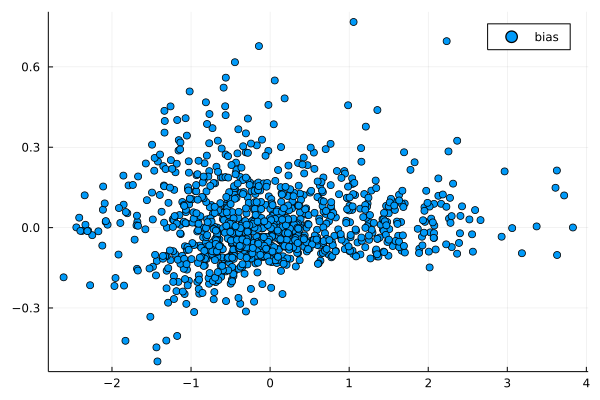

In [30]:
# include("./src/qgplsim.ji")
width_exp = -0.17
dy = 0
method = "qr"
qsmodel = qgplsim.model(Xr, Zr, yr, [0.5], width_exp)
qsmodel1 = qgplsim.model(Xr, Zr, yr, [0.1], width_exp)
qsmodel9 = qgplsim.model(Xr, Zr, yr, [0.9], width_exp)


@time qgplsim.estimator(qsmodel)
@time qgplsim.estimator(qsmodel1)
@time qgplsim.estimator(qsmodel9)

vv = Xt * qsmodel.theta
ylx = Xt * qsmodel.alpha
ylz = Zt * qsmodel.beta
gv = qgplsim.predict(qsmodel, Xt, Zt, dy, method)
yp = gv + ylx  + ylz

vv1 = Xt * qsmodel1.theta
ylx1 = Xt * qsmodel1.alpha
ylz1 = Zt * qsmodel1.beta
gv1 = qgplsim.predict(qsmodel1, Xt, Zt, dy, method)
yp1 = gv1 + ylx1  + ylz1

vv9 = Xt * qsmodel9.theta
ylx9 = Xt * qsmodel9.alpha
ylz9 = Zt * qsmodel9.beta
gv9 = qgplsim.predict(qsmodel9, Xt, Zt, dy, method)
yp9 = gv9 + ylx9  + ylz9

println(rmsd(yp, yt))
scatter(vv, yt .- yp, label = "bias")
# scatter!(vv, yp .- ylx, color = "red", label = "y_nonlinear")

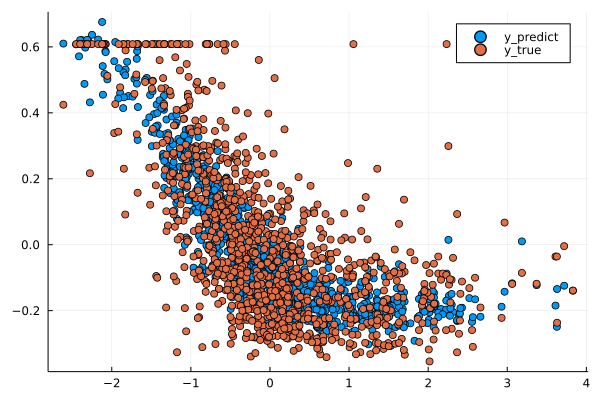

In [31]:
scatter(vv, yp,  label = "y_predict")
scatter!(vv, yt, label = "y_true")

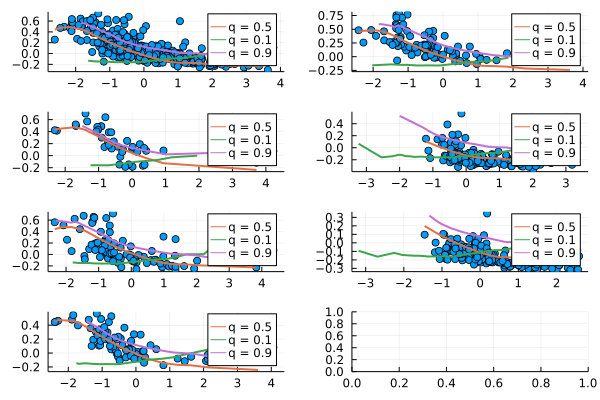

In [34]:
fig = plot(layouts = (4,2))
categ, index = collection(Zt)
for k in 1:7
    pk = fig.subplots[k]
    zk = categ[k]
    indk = index[zk]
    
    vk = vv[indk]
    vk1 = vv1[indk]
    vk9 = vv9[indk]
    
    ypk = gv[indk]
    yp1k = gv1[indk]
    yp9k = gv9[indk]
    
    ytk = yt[indk] - ylx[indk] - ylz[indk]
    ytk1 = yt[indk] - ylx1[indk] - ylz1[indk]
    ytk9 = yt[indk] - ylx9[indk] - ylz9[indk]

    sort_ind = sortperm(vk)
    sort_ind1 = sortperm(vk1)
    sort_ind9 = sortperm(vk9)

    scatter!(pk, vk, ytk, label = false)
    plot!(pk, vk[sort_ind], ypk[sort_ind], width = 2, label = "q = 0.5")
    plot!(pk, -vk1[sort_ind1], yp1k[sort_ind1], width = 2, label = "q = 0.1")
    plot!(pk, -vk9[sort_ind9], yp9k[sort_ind9], width = 2, label = "q = 0.9")

end
fig

In [10]:
qgplsim.print_model(qsmodel)

alpha => [0.0174, 0.0307, 0.0414]
theta => [0.2262, 0.7347, -0.6395]
gamma => [-0.2333, -0.1802, -0.0954, 0.1844]
beta => [-0.0446, -0.0764, -0.0588, -0.1615]


 41.642305 seconds (1.56 G allocations: 60.525 GiB, 14.91% gc time, 0.66% compilation time)
0.25700951724330184


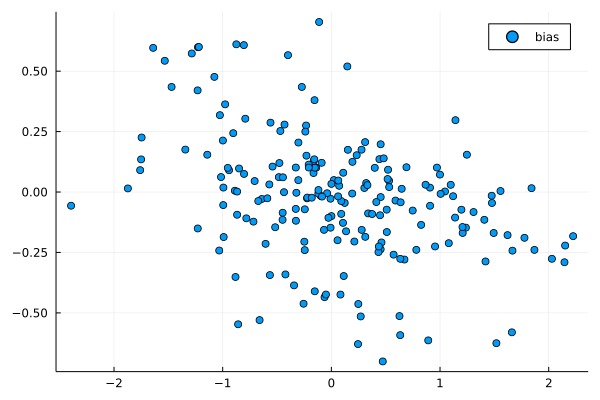

In [11]:
include("./src/semi_mave.ji")
car_model_mr = semiMAVE.model(Xr, Zr, yr)
@time semiMAVE.estimator(car_model_mr)   
gvm, = semiMAVE.predictor(car_model_mr, Xt, Zt)
ypm = gvm + Zt * car_model_mr.β
println(rmsd(ypm, yt))
scatter(vv, yt .- ypm, label = "bias")

In [12]:
semiMAVE.print_model(car_model_mr)

theta => [0.0281, -0.0404, -0.0601]
beta => [0.1144, 0.5314, 0.24, 0.1117]


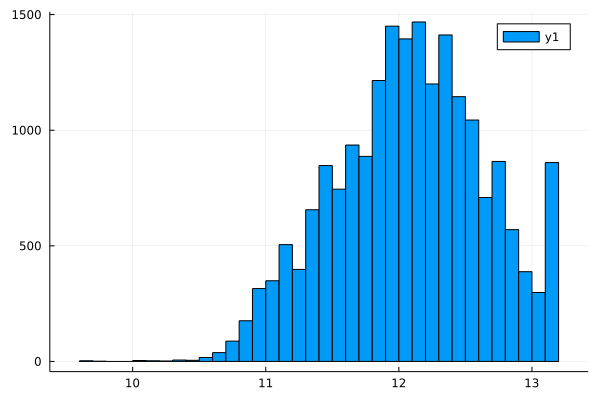

In [22]:
histogram(log.(ya))

In [13]:
rec_qr = []
rec_mr = []
# tau_qr = [0.25, 0.5, 0.75]
tau_qr = [0.5]

@threads for k in 1:20
    
    indr, indt = get_train_index(Z, ntrain)
    indt[shuffle(1:(n - ntrain))[1:200]]
    Xr, Zr, yr = X[indr, :], Z[indr, :], y[indr]
    Xt, Zt, yt = X[indt, :], Z[indt, :], y[indt]
    car_model_qr = qgplsim.model(Xr, Zr, yr, tau_qr, -0.17)
    qgplsim.estimator(car_model_qr)
    
    carmodel = car_model_qr
    vv = Xt * carmodel.theta
    ylx = Xt * carmodel.alpha
    ylz = Zt * carmodel.beta
    gvq = qgplsim.predict(carmodel, Xt, Zt, dy, "qr")
    ypq = gvq + ylx + ylz
    
    # car_model_mr = semiMAVE.model(Xr, Zr, yr)
    # semiMAVE.estimator(car_model_mr)   
    # gvm, = semiMAVE.predictor(car_model_mr, Xt, Zt)
    # ypm = gvm + Zt * car_model_mr.β
    rqr = rmsd(ypq, yt)
    # rmr = rmsd(ypm, yt) 
    push!(rec_qr, rqr)
    # push!(rec_mr, rmr)

end

In [16]:
println(mean(rec_qr))
# println(mean(rec_mr))

0.14764387411246155


In [15]:
println(std(rec_qr))
# println(std(rec_mr))

0.017438231013095985


In [17]:
rec_qr

20-element Vector{Any}:
 0.1425833054155303
 0.1450236453275694
 0.18150185591528342
 0.20960884830077509
 0.14323485850493012
 0.1409466910178586
 0.1488213413298906
 0.13771365926502482
 0.1375959270658782
 0.1524163492231283
 0.14254411760023103
 0.14296735312605033
 0.14015263096011493
 0.14219106766366052
 0.14408051966066712
 0.13887709844600188
 0.14114779263407132
 0.13685160959720802
 0.1382871565199994
 0.14633165467535764

In [ ]:
maximum(rec_mr)

In [251]:
qsmodel9.widthExp

-0.17

## Monte Carlo Simulation

In [95]:
n_pt = 5
nmc = n_pt*Threads.nthreads()
mse = zeros(nmc)
t = 1
X = scaler(Xa, 1)
y = log.(ya)
medy = median(y)
Z = categ_binary(Za) # [:, 1]
categ, index = collection(Z)
n,p = size(X)  
n,q = size(Z)

(20000, 6)

In [116]:
outlier_mse = []
outlier_v = []
outlier_yt = []
outlier_yp = []
outlier_model = []
outlier_indr = []
outlier_indt = []

Any[]

In [117]:
width_exp = -0.0
tau = [0.5]
dv_order = 2
ntrain = 1000
ntest = n - ntrain
Theta_ = zeros(nmc, p)
Alpha_ = zeros(nmc, p)
Gamma_ = zeros(nmc, q)
Beta_ = zeros(nmc, q)
method = "optim" # mean for mean regression, optim and mm for qr regression
# tau = [0.25, 0.5,  0.75]
@threads for i in 1:Threads.nthreads()
    for j in tqdm(1:n_pt)
    t = (i - 1)*n_pt + j 
    indr, indt = get_train_index(Z, ntrain)

    Xr = X[indr, :]
    yr = y[indr] 
    Zr = Z[indr, :]

    Xt = X[indt, :]
    yt = y[indt]  
    Zt = Z[indt, :]

    qsmodel = qgplsim.model(Xr, Zr, yr, tau, width_exp)

    # qsmodel1 = qgplsim.model(Xr, Zr, yr, 0.1)
    # qsmodel9 = qgplsim.model(Xr, Zr, yr, 0.9)
    # @time qgplsim.estimator(qsmodel1)
    # @time qgplsim.estimator(qsmodel9)

    Theta_[t, :], Gamma_[t, :],
    Alpha_[t, :], Beta_[t, :] = qgplsim.estimator(qsmodel)

    vv = Xt * qsmodel.theta
    ylx = Xt * qsmodel.alpha
    ylz = Zt * qsmodel.beta
    yp = qgplsim.predict(qsmodel, Xt, Zt, dv_order, method) + ylx  + ylz
    ## yp .= (abs.(yp) .> 1e2) .* 0 + (abs.(yp) .<= 1e2) .* yp
    # bias = rho.(yt - yp, tau)./2
    # println(res)
    mse[t] = rmsd(yp, yt)
    if mse[t] > 0.00
        push!(outlier_mse, mse[t])
        push!(outlier_v, vv)
        push!(outlier_yp, yp)
        push!(outlier_yt, yt)
        push!(outlier_indr, indr)
        push!(outlier_indt, indt)       
        push!(outlier_model, qsmodel)
    end
        
    end
end

0.0%0.0%0.0%┣┣0.0%┣┣                                                                                                                                                                                                ┫ ┫ ┫ ┫ 0/5 [00:00<00:00, -0s/it]0/5 [00:00<00:00, -0s/it]0/5 [00:00<00:00, -0s/it]0/5 [00:00<00:00, -0s/it]



20.0%┣████████▋                                  ┫ 1/5 [01:27<Inf:Inf, InfGs/it]
20.0%┣████████▋                                  ┫ 1/5 [01:29<Inf:Inf, InfGs/it]
20.0%┣████████▋                                  ┫ 1/5 [01:29<Inf:Inf, InfGs/it]
20.0%┣████████▋                                  ┫ 1/5 [01:32<Inf:Inf, InfGs/it]
40.0%┣██████████████████▍                           ┫ 2/5 [02:58<08:54, 178s/it]
40.0%┣██████████████████▍                           ┫ 2/5 [03:00<09:01, 180s/it]
40.0%┣██████████████████▍                           ┫ 2/5 [03:03<09:09, 183s/it]
40.0%┣██████████████████▍                           ┫ 2/5 [03:11<09:33, 191s/it]
60.0%┣██████████████████████

In [118]:
mean(mse) ^ 2

0.12326132108531819

In [114]:
mse .^ 2


20-element Vector{Float64}:
 0.1053463635188889
 0.11143346715105507
 0.42568103263137425
 0.10510130681034012
 0.10434583615157357
 0.10818920950678342
 0.10181156286354204
 0.12344572317300631
 0.10339392419577621
 0.10580019564855205
 0.10496661651217888
 0.11290570159926237
 0.10370701103142191
 0.10409819307030016
 0.1062793662203775
 0.11375650404959195
 0.11071834226903722
 0.104764929777004
 0.10698419789383135
 0.11435395599273204

In [107]:
for j in 1:nmc
    println(outlier_model[j].widthExp)
end

-0.2
-0.155
-0.005
-0.2
0.055
0.055
-0.2
-0.2
0.01
-0.185
-0.14
0.1
-0.2
0.07
-0.065
0.1
0.1
0.1
0.04
0.04


In [119]:
mean(Theta_, dims = 1)

1×3 Matrix{Float64}:
 0.484751  0.0252864  0.261766

In [124]:
mean(Gamma_, dims = 1)

1×6 Matrix{Float64}:
 -0.0405151  -0.103575  0.00972122  -0.154201  -0.0427861  -0.136968

In [122]:
mean(Alpha_, dims = 1)

1×3 Matrix{Float64}:
 -0.0379224  -0.112694  0.22778

In [123]:
mean(Beta_, dims = 1)

1×6 Matrix{Float64}:
 -0.0112366  -0.00248239  0.0939952  -0.030484  0.0674751  -0.0230397

In [120]:
var(Theta_, dims = 1)

1×3 Matrix{Float64}:
 0.0880756  0.399551  0.244852

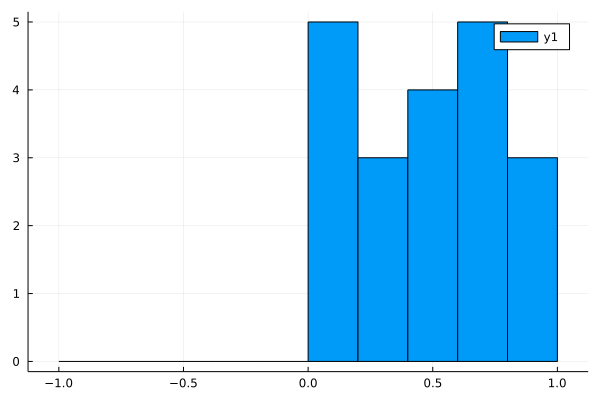

In [121]:
histogram(Theta_[:,1], bins = -1:0.2:1)

In [48]:
# for j in 5:30
using Plots
j = 2
vvj = outlier_v[j]
ypj = outlier_yp[j]
ytj = outlier_yt[j]
indrj = outlier_indr[j]
indtj = outlier_indt[j]
modelj = outlier_model[j]
println(mean(vvj), " ", std(vvj))
bias = (ytj .- ypj).^2
# println(mse[j])
println(sum((bias))./ntest)
# end
scatter(vvj, ypj - ytj, label = "bias")

-0.00012234677565488338 0.6479484139899876
0.10594029303517893


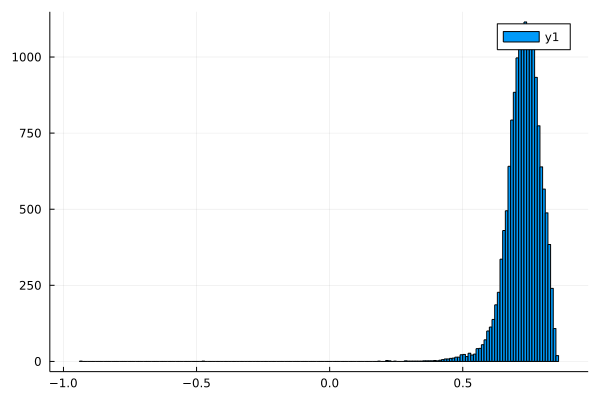

In [221]:
histogram(vvj)

In [49]:
fig = plot(layouts = (1,3))
categ, index = collection(Z[indtj, :])
for k in 1:3
    pk = fig.subplots[k]
    zk = categ[k]
    indk = index[zk]
    vk = vvj[indk]
    ypk = ypj[indk]
    # yp1k = yp1[indk]
    # yp9k = yp9[indk]
    ytk = ytj[indk]
    scatter!(pk, vk, ytk, label = false)
    
#     indvk = sortperm(vk)
    scatter!(pk, vk, ypk, label = false)
    # scatter!(pk, vk, yp1k, label = false)
    # scatter!(pk, vk, yp9k, label = false)
end
fig

## Path Plots

In [ ]:
g = zeros(ntest)
dg = zeros(ntest)
yz = ytj  # - ylx - ylz
τ = tau
v = vvj
categ, index = collection(Z[indtj, :])
z = collect(index)
ncateg = index.count
width = zeros(ncateg)
v0 = -1e6
v1 = 1e6
bd = -0.17
# max_v = maximum(v)
# min_v = minimum(v)
# widv =   max_v - min_v    
# v = ((v .- min_v) / widv .- 0.5) * 4

for k in 1:ncateg
    vk = v[z[k][2]]
    h = (length(vk))^(bd) * std(vk)   
    # println(h)
    width[k] = h 

    dgk(u) = qgplsim.Gz(u, vk, yz[z[k][2]], 1, τ, bd)
    gk(u) = qgplsim.Gz(u, vk, yz[z[k][2]], 0, τ, bd)

    dg[z[k][2]] = dgk(vk)
    g[z[k][2]] = gk(vk)

    vkmin = minimum(vk) # + h
    vkmax = maximum(vk) # - h

    if  vkmin > v0
        v0 = vkmin
    end
    if  vkmax < v1
        v1 = vkmax
    end  
end

mh = minimum(width)
v0 = v0 + 1*mh
v1 = v1 - 1*mh


v_ = v[v .> v1]
_v = v[v .< v0]

v_ = minimum(v_)
_v = maximum(_v)
# _v, v_

C0 = zeros(ncateg)
C1 = zeros(ncateg)
dgf(vv, k) = qgplsim.Gz(vv, v[z[k][2]], yz[z[k][2]], 1, τ)

p1 = plot()
p2 = plot()
for m in 1:ncateg
    C0[m] = dgf(_v, m)[1]
    C1[m] = dgf(v_, m)[1]

    vm = v[index[categ[m]]]
    dgm = dg[index[categ[m]]]
    gm = g[index[categ[m]]]
    indm = sortperm(vm)
    sorted_dgm = dgm[indm]
    sorted_gm = gm[indm]
    sorted_vm = vm[indm]
    plot!(p1, sorted_vm, sorted_gm, label = false ) # L"g_{%$m} (v)")
    plot!(p2, sorted_vm, sorted_dgm, label = false ) # L"\nabla g_{%$m} (v)")

end

c0 = maximum(C0)
c1 = minimum(C1) # minimum(C1[C1 .> c0])
println("[$c0, $c1]")
println("[$v0, $v1]")

plot!(p2, [v0, v0], [c0, c1], color = "black", label = false)
plot!(p2, [v1, v1], [c0, c1], color = "black", label = false)
plot!(p2, [v0, v1], [c0, c0], color = "black", label = false)
plot!(p2, [v0, v1], [c1, c1], color = "black", label = false)


plot(p1, p2, layout = (1,2))